In [ ]:
import json
import numpy as np
import cv2
import warnings

# 경고 무시 설정
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

import os
import natsort
#라벨링 데이터 업로드
label_path = r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\2.라벨링데이터\damage" #폴더 위치

label_file_list = natsort.natsorted(os.listdir(label_path))  # 파일의 숫자 오름차순으로 정렬

## 목적:사고 차량 이미지에서 유형별 손상 식별하기
#### 사고 발생 시 객관적이고 보편적인 견적을 빠르게 산출하여, 다음과 같은 과정을 간소화하고 이해 당사자 간 분쟁을 줄일 수 있다.  
-보험 청구  
-정비소의 수리비 청구  
-렌트카업체의 손상여부 모니터링

In [ ]:
# 라벨링 데이터 무작위로 열어보기
import random
with open(r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\2.라벨링데이터\damage" + '/' + '0508694_as-3382746.json', encoding="UTF-8") as f:
    data = json.load(f)
data

{'info': {'name': 'external', 'date_created': '03/08/2022'},
 'images': {'id': 1,
  'width': 800,
  'height': 600,
  'file_name': '0508694_as-3382746.jpg'},
 'annotations': [{'id': 1,
   'image_id': 1,
   'category_id': 'as-3382746',
   'segmentation': [[[[716, 48],
      [762, 36],
      [795, 37],
      [795, 106],
      [754, 147],
      [639, 100],
      [644, 74],
      [716, 48]]]],
   'area': 11425.5,
   'bbox': [639, 36, 156, 111],
   'damage': 'Crushed',
   'part': None,
   'year': 2012,
   'color': 'Others',
   'level': None,
   'repair': ['Front bumper:exchange']},
  {'id': 2,
   'image_id': 1,
   'category_id': 'as-3382746',
   'segmentation': [[[[607, 65],
      [653, 34],
      [695, 0],
      [766, 2],
      [721, 38],
      [772, 36],
      [784, 56],
      [701, 139],
      [617, 119],
      [497, 126],
      [497, 115],
      [514, 101],
      [568, 96],
      [607, 65]]]],
   'area': 18733.0,
   'bbox': [497, 0, 287, 139],
   'damage': 'Scratched',
   'part': None,
 

## 클래스별 데이터 분류


In [ ]:
cr=[]
for file in label_file_list:
  with open(r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\2.라벨링데이터\damage" + '/' + file, encoding="UTF-8") as f:
    data = json.load(f)
    for ann in data['annotations']:
      if ann['damage'] =='Crushed':
        cr.append(data['images']['file_name'])
        break
      else:
        continue

In [ ]:
se=[]
for file in label_file_list:
  with open(r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\2.라벨링데이터\damage" + '/' + file, encoding="UTF-8") as f:
    data = json.load(f)
    for ann in data['annotations']:
      if ann['damage'] =='Separated':
        se.append(data['images']['file_name'])
        break
      else:
        continue

In [ ]:
br=[]
for file in label_file_list[:]:
  with open(r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\2.라벨링데이터\damage" + '/' + file, encoding="UTF-8") as f:
    data = json.load(f)
    for ann in data['annotations']:
      if ann['damage'] =='Breakage':
        br.append(data['images']['file_name'])
        break
      else:
        continue

In [ ]:
sc=[]
for file in label_file_list:
  with open(r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\2.라벨링데이터\damage" + '/' + file, encoding="UTF-8") as f:
    data = json.load(f)
    for ann in data['annotations']:
      if ann['damage'] =='Scratched':
        sc.append(data['images']['file_name'])
        break
      else:
        continue

In [ ]:
# 7000개 추출
cr = cr2[4000:11000]
se=se2[4000:11000]
br=br2[4000:11000]
sc=sc2[4000:11000]

## 입력 데이터 셋 생성

In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import time

In [ ]:
# 이미지 파일 로드
image_dir = r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\1.원천데이터\damage" # image 파일 폴더

image_file_list = natsort.natsorted(os.listdir(image_dir))

In [ ]:
import cv2
from PIL import Image

### 이미지 데이터 1개 랜덤으로 열어보기

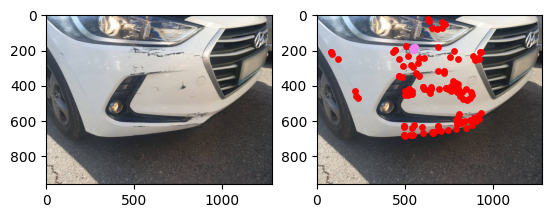

In [ ]:
from PIL import Image
import random

Xsc_coordinates=[]
Xcr_coordinates=[]
Xse_coordinates=[]
Xbr_coordinates=[]

Ysc_coordinates=[]
Ycr_coordinates=[]
Yse_coordinates=[]
Ybr_coordinates=[]


random_sample=random.sample(image_file_list,1)[0]
random_sample_json=random_sample.replace(".jpg", ".json")
# 이미지 파일 로드
image = Image.open('/content/drive/MyDrive/New_Sample/원천데이터/TS_damage/damage' + '/' + random_sample)
with open('/content/drive/MyDrive/New_Sample/라벨링데이터/TL_damage/damage' + '/' + random_sample_json, encoding="UTF-8") as f:
    data = json.load(f)
    for ann in data['annotations']:
      if ann['damage'] == 'Scratched':
        for coordinate_pair in ann['segmentation'][0][0]:
            Xsc, Ysc = coordinate_pair
            Xsc_coordinates.append(Xsc)
            Ysc_coordinates.append(Ysc)
      elif ann['damage'] == 'Crushed':
        for coordinate_pair in ann['segmentation'][0][0]:
            Xcr, Ycr = coordinate_pair
            Xcr_coordinates.append(Xcr)
            Ycr_coordinates.append(Ycr)
      elif ann['damage'] == 'Separated':
        for coordinate_pair in ann['segmentation'][0][0]:
            Xse, Yse = coordinate_pair
            Xse_coordinates.append(Xse)
            Yse_coordinates.append(Yse)
      else:
        for coordinate_pair in ann['segmentation'][0][0]:
            Xbr, Ybr = coordinate_pair
            Xbr_coordinates.append(Xbr)
            Ybr_coordinates.append(Ybr)

# 이미지 표시
plt.subplot(1,2,1)
plt.imshow(image)
#plt.axis('off')  # 축 정보 끄기

# 파손 유형별로 색깔 표시해보기
plt.subplot(1,2,2)
plt.imshow(image)
plt.scatter(Xsc_coordinates, Ysc_coordinates, c='r',s=15)
plt.scatter(Xcr_coordinates, Ycr_coordinates, c='orange',s=15)
plt.scatter(Xse_coordinates, Yse_coordinates, c='b',s=15)
plt.scatter(Xbr_coordinates, Ybr_coordinates, c='violet',s=15)

plt.show()

In [ ]:
cv2.imread('/content/drive/MyDrive/New_Sample/원천데이터/TS_damage/damage' + '/' + random_sample)

array([[[216, 181, 161],
        [228, 195, 175],
        [236, 204, 181],
        ...,
        [120, 115, 112],
        [120, 115, 112],
        [119, 114, 111]],

       [[206, 171, 151],
        [224, 190, 167],
        [231, 199, 176],
        ...,
        [121, 116, 113],
        [120, 115, 112],
        [120, 115, 112]],

       [[197, 160, 138],
        [216, 182, 158],
        [226, 195, 170],
        ...,
        [121, 116, 113],
        [120, 115, 112],
        [120, 115, 112]],

       ...,

       [[231, 248, 255],
        [212, 229, 238],
        [186, 202, 214],
        ...,
        [ 57,  54,  56],
        [ 57,  54,  56],
        [ 61,  60,  62]],

       [[210, 228, 235],
        [183, 200, 209],
        [171, 187, 199],
        ...,
        [ 58,  57,  61],
        [ 57,  56,  60],
        [ 61,  62,  66]],

       [[175, 193, 200],
        [180, 198, 205],
        [174, 190, 202],
        ...,
        [ 59,  58,  62],
        [ 57,  58,  62],
        [ 63,  64,  68]]

정규화 필요

### 데이터 크기 조합 계산


In [ ]:
cv2.imread('/content/drive/MyDrive/New_Sample/원천데이터/TS_damage/damage' + '/' + random_sample)
size=[]

for filename in image_file_list:
        if not filename.endswith('jpg'):
            continue
        url = os.path.join(image_dir, filename)
        img = cv2.imread(url)  # 이미지 읽기
        height, width, channels = img.shape
        shapes=(height,width, channels)
        size.append(shapes)




In [ ]:

unique_shapes=set(size)
print(f"유일한 조합의 개수: {len(unique_shapes)}")
print("각 유형들:")
for shape in unique_shapes:
    print(shape)


유일한 조합의 개수: 165
각 유형들:
(1026, 800, 3)
(944, 938, 3)
(1066, 800, 3)
(707, 936, 3)
(716, 800, 3)
(627, 1280, 3)
(739, 800, 3)
(600, 913, 3)
(1425, 800, 3)
(727, 1218, 3)
(1600, 800, 3)
(741, 1280, 3)
(600, 2055, 3)
(1356, 800, 3)
(600, 1060, 3)
(1047, 800, 3)
(733, 992, 3)
(600, 943, 3)
(640, 1280, 3)
(785, 1090, 3)
(1021, 1280, 3)
(1024, 1024, 3)
(780, 1067, 3)
(872, 800, 3)
(1055, 800, 3)
(1428, 800, 3)
(1078, 800, 3)
(1215, 1280, 3)
(1068, 800, 3)
(600, 1077, 3)
(847, 1280, 3)
(600, 815, 3)
(699, 1280, 3)
(750, 1000, 3)
(605, 1280, 3)
(1020, 800, 3)
(600, 828, 3)
(1076, 800, 3)
(768, 1024, 3)
(763, 801, 3)
(1111, 1280, 3)
(600, 1043, 3)
(705, 950, 3)
(1109, 801, 3)
(1647, 800, 3)
(1088, 800, 3)
(754, 800, 3)
(799, 801, 3)
(814, 1280, 3)
(600, 1613, 3)
(600, 1067, 3)
(708, 947, 3)
(604, 800, 3)
(850, 1146, 3)
(600, 1124, 3)
(1069, 800, 3)
(1059, 800, 3)
(796, 807, 3)
(600, 1150, 3)
(1009, 1009, 3)
(1280, 1183, 3)
(1140, 1280, 3)
(1649, 800, 3)
(600, 1086, 3)
(1646, 800, 3)
(600, 969, 3

원본 이미지는 165가지의 종류를 가지는 shapes로 구성되어 있으며 공통으로 3채널을 가진다.  






In [ ]:
# crushed 이미지 파일 수집

c = []

for filename in cr:
    if not filename.endswith('jpg'):
        continue
    url = r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\1.원천데이터\damage\\" + filename
    try:
        img = Image.open(url)  # 이미지를 열려고 시도
        img = np.array(img)    # 이미지를 NumPy 배열로 변환
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환

        img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)  # 이미지 크기 조정
        img = img / 255.0  # 픽셀 값을 0~1 사이로 정규화
        c.append(img)  # 정상적인 이미지 리스트에 추가

    except Exception as e:
        print(f"Error processing {filename}: {e}")  # 오류 발생 시 메시지 출력




In [ ]:
# separated 이미지 파일 수집
s = []

for filename in se:
        if not filename.endswith('jpg'):
            continue
        url = url = r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\1.원천데이터\damage\\" + filename # 이미지 파일 경로
        try:
            img = Image.open(url)  # 이미지를 열려고 시도
            img = np.array(img)    # 이미지를 NumPy 배열로 변환
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환

            img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)  # 이미지 크기 조정
            img = img / 255.0  # 픽셀 값을 0~1 사이로 정규화
            s.append(img)  # 정상적인 이미지 리스트에 추가
            if len(s) == 7000:
                break
        except Exception as e:
            print(f"Error processing {filename}: {e}")  # 오류 발생 시 메시지 출력


In [ ]:
# breakage 이미지 파일 수집
b = []

for filename in br:
    if not filename.endswith('jpg'):
        continue
    url = r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\1.원천데이터\damage\\" + filename
    try:
        img = Image.open(url)  # 이미지를 열려고 시도
        img = np.array(img)    # 이미지를 NumPy 배열로 변환
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환

        img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)  # 이미지 크기 조정
        img = img / 255.0  # 픽셀 값을 0~1 사이로 정규화

        b.append(img)  # 정상적인 이미지 리스트에 추가
        if len(b) == 7000:
            break
    except Exception as e:
        print(f"Error processing {filename}: {e}")  # 오류 발생 시 메시지 출력


In [ ]:
# scratched 이미지 파일 수집
sci = []

for filename in sc:
    if not filename.endswith('jpg'):
        continue
    url = r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\1.원천데이터\damage\\" + filename
    try:
        img = Image.open(url)  # 이미지를 열려고 시도
        img = np.array(img)    # 이미지를 NumPy 배열로 변환
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환

        img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)  # 이미지 크기 조정
        img = img / 255.0  # 픽셀 값을 0~1 사이로 정규화

        sci.append(img)  # 정상적인 이미지 리스트에 추가
        if len(sci) == 10000:
            break
    except Exception as e:
        print(f"Error processing {filename}: {e}")  # 오류 발생 시 메시지 출력

## mask 생성

In [ ]:
def create_mask(height, width, x_coords, y_coords):
    if not x_coords or not y_coords:  # 좌표 리스트가 비어있는 경우 None 반환
        return None
    mask = np.zeros((height, width), dtype=np.uint8)
    pts = np.array([list(zip(x_coords, y_coords))], dtype=np.int32)
    cv2.fillPoly(mask, pts, 1)
    return mask


Mask_cr = []


for file in cr:
    file=file.replace(".jpg", ".json")
    with open(r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\2.라벨링데이터\damage" + '/' + file, encoding="UTF-8") as f:

        data = json.load(f)
        height = data['images']['height']
        width = data['images']['width']
        x_ratio = 256 / width
        y_ratio = 256 / height
        ms=[]
        for ann in data['annotations']:
            damage_type = ann['damage']

            Xcr_coordinates = []
            Ycr_coordinates = []
            for coordinate_pair in ann['segmentation'][0][0]:
                X, Y = coordinate_pair
                if damage_type == 'Crushed':
                    Xcr_coordinates.append(X * x_ratio)
                    Ycr_coordinates.append(Y * y_ratio)
            ms.append(create_mask(256, 256, Xcr_coordinates, Ycr_coordinates))
        ms = [mask for mask in ms if mask is not None]
        # ms 리스트의 각 항목을 NumPy 배열로 변환
        ms_arrays = [np.array(mask) for mask in ms]

        # NumPy 배열들을 3차원 배열로 결합
        ms_combined = np.stack(ms_arrays)

        combined_mask = np.any(ms_combined, axis=0).astype(int)




        Mask_cr.append(combined_mask)


In [ ]:
def create_mask(height, width, x_coords, y_coords):
    if not x_coords or not y_coords:  # 좌표 리스트가 비어있는 경우 None 반환
        return None
    mask = np.zeros((height, width), dtype=np.uint8)
    pts = np.array([list(zip(x_coords, y_coords))], dtype=np.int32)
    cv2.fillPoly(mask, pts, 1)
    return mask


Mask_se = []


for file in se:
    file=file.replace(".jpg", ".json")
    with open(r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\2.라벨링데이터\damage" + '/' + file, encoding="UTF-8") as f:

        data = json.load(f)
        height = data['images']['height']
        width = data['images']['width']
        x_ratio = 256 / width
        y_ratio = 256 / height
        ms=[]
        for ann in data['annotations']:
            damage_type = ann['damage']

            Xse_coordinates = []
            Yse_coordinates = []
            for coordinate_pair in ann['segmentation'][0][0]:
                X, Y = coordinate_pair
                if damage_type == 'Separated':
                    Xse_coordinates.append(X * x_ratio)
                    Yse_coordinates.append(Y * y_ratio)
            ms.append(create_mask(256, 256, Xse_coordinates, Yse_coordinates))
        ms = [mask for mask in ms if mask is not None]
        # ms 리스트의 각 항목을 NumPy 배열로 변환
        ms_arrays = [np.array(mask) for mask in ms]

        # NumPy 배열들을 3차원 배열로 결합
        ms_combined = np.stack(ms_arrays)

        combined_mask = np.any(ms_combined, axis=0).astype(int)




        Mask_se.append(combined_mask)


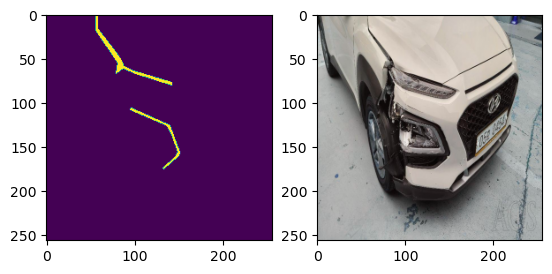

In [ ]:
plt.subplot(1,2,1)
plt.imshow(Mask_se[6998])


plt.subplot(1,2,2)
plt.imshow(s[6998])

plt.show()

In [ ]:
def create_mask(height, width, x_coords, y_coords):
    if not x_coords or not y_coords:  # 좌표 리스트가 비어있는 경우 None 반환
        return None
    mask = np.zeros((height, width), dtype=np.uint8)
    pts = np.array([list(zip(x_coords, y_coords))], dtype=np.int32)
    cv2.fillPoly(mask, pts, 1)
    return mask


Mask_br = []


for file in br:
    file=file.replace(".jpg", ".json")
    with open(r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\2.라벨링데이터\damage" + '/' + file, encoding="UTF-8") as f:

        data = json.load(f)
        height = data['images']['height']
        width = data['images']['width']
        x_ratio = 256 / width
        y_ratio = 256 / height
        ms=[]
        for ann in data['annotations']:
            damage_type = ann['damage']

            Xbr_coordinates = []
            Ybr_coordinates = []
            for coordinate_pair in ann['segmentation'][0][0]:
                X, Y = coordinate_pair
                if damage_type == 'Breakage':
                    Xbr_coordinates.append(X * x_ratio)
                    Ybr_coordinates.append(Y * y_ratio)
            ms.append(create_mask(256, 256, Xbr_coordinates, Ybr_coordinates))
        ms = [mask for mask in ms if mask is not None]
        # ms 리스트의 각 항목을 NumPy 배열로 변환
        ms_arrays = [np.array(mask) for mask in ms]

        # NumPy 배열들을 3차원 배열로 결합
        ms_combined = np.stack(ms_arrays)

        combined_mask = np.any(ms_combined, axis=0).astype(int)




        Mask_br.append(combined_mask)

In [ ]:
def create_mask(height, width, x_coords, y_coords):
    if not x_coords or not y_coords:  # 좌표 리스트가 비어있는 경우 None 반환
        return None
    mask = np.zeros((height, width), dtype=np.uint8)
    pts = np.array([list(zip(x_coords, y_coords))], dtype=np.int32)
    cv2.fillPoly(mask, pts, 1)
    return mask


Mask_sc = []


for file in sc:
    file=file.replace(".jpg", ".json")
    with open(r"C:\Users\eodnj\OneDrive\바탕 화면\차량파손이미지\01.데이터\2.Validation\2.라벨링데이터\damage" + '/' + file, encoding="UTF-8") as f:

        data = json.load(f)
        height = data['images']['height']
        width = data['images']['width']
        x_ratio = 256 / width
        y_ratio = 256 / height
        ms=[]
        for ann in data['annotations']:
            damage_type = ann['damage']

            Xsc_coordinates = []
            Ysc_coordinates = []
            for coordinate_pair in ann['segmentation'][0][0]:
                X, Y = coordinate_pair
                if damage_type == 'Scratched':
                    Xsc_coordinates.append(X * x_ratio)
                    Ysc_coordinates.append(Y * y_ratio)
            ms.append(create_mask(256, 256, Xsc_coordinates, Ysc_coordinates))
        ms = [mask for mask in ms if mask is not None]
        # ms 리스트의 각 항목을 NumPy 배열로 변환
        ms_arrays = [np.array(mask) for mask in ms]

        # NumPy 배열들을 3차원 배열로 결합
        ms_combined = np.stack(ms_arrays)

        combined_mask = np.any(ms_combined, axis=0).astype(int)




        Mask_sc.append(combined_mask)


### 파손 유형별 mask(target) 의 이미지당 파손부위 픽셀개수 비율 평균
#### 이미지별 픽셀 클래스 불균형 확인

In [ ]:
def calculate_class_ratio(mask, class_id):
    class_count = np.sum(mask == class_id)
    total_count = mask.size
    return class_count / total_count

sc_ratio=[]
cr_ratio=[]
se_ratio=[]
br_ratio=[]

for dam in ['sc', 'cr', 'se', 'br']:

    dam_masks = globals()[f'Y_{dam}']
    dam_ratio = []


    for mask in dam_masks:
        ratio = calculate_class_ratio(mask, 1)
        dam_ratio.append(ratio)


    globals()[f'{dam}_ratio'] = np.array(dam_ratio)



print('scratched:',100*np.sum(sc_ratio)/len(sc_ratio),'%')
print('crushed:',100*np.sum(cr_ratio)/len(cr_ratio),'%')
print('separated:',100*np.sum(se_ratio)/len(se_ratio),'%')
print('breakaged:',100*np.sum(br_ratio)/len(br_ratio),'%')


scratched: 4.971248230039784 %
crushed: 4.793047223772321 %
separated: 2.48047836183563 %
breakaged: 3.1227092501483384 %


## 생성된 데이터셋 저장

In [ ]:

b= np.array(b, dtype=np.float32)  # 데이터 타입을 float32로 설정
Mask_br = np.array(Mask_br, dtype=np.float32) # 데이터 타입을 float32로 설정


#np.save(r"C:\Users\eodnj\OneDrive\사진\데이터셋\Xcr.npy", c)
#np.save(r"C:\Users\eodnj\OneDrive\사진\데이터셋\Ycr.npy", Mask_cr)

#np.save(r"C:\Users\eodnj\OneDrive\사진\데이터셋\Xse.npy", s)
#np.save(r"C:\Users\eodnj\OneDrive\사진\데이터셋\Yse.npy", Mask_se)
np.save(r"C:\Users\eodnj\OneDrive\사진\데이터셋\Xbr.npy", b)
np.save(r"C:\Users\eodnj\OneDrive\사진\데이터셋\Ybr.npy", Mask_br)
#np.save(r"C:\Users\eodnj\OneDrive\사진\데이터셋\Xsc.npy", sci)
#np.save(r"C:\Users\eodnj\OneDrive\사진\데이터셋\Ysc.npy", Mask_sc)